In [1]:
import geopandas as gpds
import networkx as nx
import time
import random
import matplotlib.pyplot as plt
import json

In [2]:
# Storing data
roads = gpds.read_file('data/sfo_roads.shp')
nodes = gpds.read_file('data/sfo_nodes.shp')

In [4]:
'''
Making shape to NetworkX shortest_path function input format
'''

Edges_Nx = []

for i in range(len(roads)):
    Edge_Nx = (roads.STARTID.iloc[i],roads.ENDID.iloc[i], {'weight':(roads.LENGTH.iloc[i])})
    Edges_Nx.append(Edge_Nx)
    
    
G = nx.Graph()
for i in range(len(roads)):
    G.add_node(i)
G.add_edges_from(Edges_Nx)

In [5]:
def Random_Dijkstra_NetworkX(OutputName):
    '''
    
    This function returns the nodes on the path with QGIS SQL query format.
    Also it generates the geojson output which contains the path nodes as point layer.
    
    '''
    Nodes = []

    # Random nodes selecting
    for i in range(len(nodes)):
        NodeId = str(int(nodes["ID"][i]))

        Nodes.append(NodeId)

    
    index_start = random.randint(0,len(nodes))
    index_finish = random.randint(0,len(nodes))

    Starting_Node = Nodes[index_start]
    Ending_Node = Nodes[index_finish]
    
    
    out_dict = {
    "type": "FeatureCollection",
    "name": OutputName,
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::3857" } },
    "features": [
    ]
    }

    
    try:
        NX_path = nx.shortest_path(G, source=int(Starting_Node), target=int(Ending_Node), weight='weight')
    
        NX_path_SQL = ""

        for j in range(len(NX_path)):
            query = (' "ID" = {} or '.format(NX_path[j]) )
    #           
            NX_path_SQL += query
        
        
        NX_path_SQL = NX_path_SQL[:-4]
        
        
        for i in range(len(NX_path)):
    
    

            X_coord = nodes[nodes["ID"] == NX_path[i]].geometry.item().x #["898840504"]
            Y_coord = nodes[nodes["ID"] == NX_path[i]].geometry.item().y



            point_feature = { "type": "Feature", "properties": { "ID": i }, "geometry": { "type": "Point", "coordinates": [ X_coord, Y_coord ] } }

            out_dict["features"].append(point_feature)
        
        
        OutputString = "result/{}.geojson".format(OutputName) 

        with open(OutputString, 'w') as file:
             file.write(json.dumps(out_dict))

    except:
        NX_path_SQL = "There is no path between {} and {}.".format(Starting_Node,Ending_Node)
        
        
    return NX_path_SQL

    

In [6]:
Random_Dijkstra_NetworkX("path")

' "ID" = 942087551 or  "ID" = 942082839 or  "ID" = 48490281 or  "ID" = 48490276 or  "ID" = 276593288 or  "ID" = 832164753 or  "ID" = 48490274 or  "ID" = 48490266 or  "ID" = 832164752 or  "ID" = 832164751 or  "ID" = 48490172 or  "ID" = 975064512 or  "ID" = 48490164 or  "ID" = 48490160 or  "ID" = 946322361 or  "ID" = 48490166 or  "ID" = 834392106 or  "ID" = 942087148 or  "ID" = 942087147 or  "ID" = 942087146 or  "ID" = 48490181 or  "ID" = 276593540 or  "ID" = 942084053 or  "ID" = 885924100 or  "ID" = 816518727 or  "ID" = 885924101 or  "ID" = 831962525 or  "ID" = 48506219 or  "ID" = 48506228 or  "ID" = 48506222 or  "ID" = 834974183 or  "ID" = 281058609 or  "ID" = 48506199 or  "ID" = 920435567 or  "ID" = 847346856 or  "ID" = 834974182 or  "ID" = 819227414 or  "ID" = 48506196 or  "ID" = 48506193 or  "ID" = 968896432 or  "ID" = 48504967 or  "ID" = 920535633 or  "ID" = 920535629 or  "ID" = 48504968 or  "ID" = 310109660 or  "ID" = 48504969 or  "ID" = 920535630 or  "ID" = 914279458 or  "ID" = 9

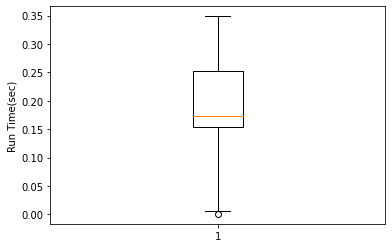

The maximum time sequence for 48499546 node to 50156820 node path. It visited 504 nodes to reach its destination.
The minimum time sequence for 50092768 node to 50094809 node path. It visited 23 nodes to reach its destination.
these two files have been added to the result folder as .geojson format


In [12]:
'''
This cell select N start and finish node. 
It generates two shapefile for one of them is minimum time cost path the other one is maximum time cost weight.

'''


N = 30 #It related with how many route will generated

Nodes = []

# Random nodes selecting
for i in range(len(nodes)):
    NodeId = str(int(nodes["ID"][i]))

    Nodes.append(NodeId)

Random_Edges_Dijkstra_Start = []
Random_Edges_Dijkstra_Finish = []

for i in range(N):
    index_start = random.randint(0,len(nodes))
    index_finish = random.randint(0,len(nodes))

    Random_Edges_Dijkstra_Start.append(Nodes[index_start])
    Random_Edges_Dijkstra_Finish.append(Nodes[index_finish])
    
Time_List = []
min_time = 999999999999999999999999999
min_path = []
max_time = 0

Count_No_path = 0

for i in range (len(Random_Edges_Dijkstra_Start)):
    
    try:
        Start_Nx = time.time()
        NX_path = nx.shortest_path(G, source=int(Random_Edges_Dijkstra_Start[i]), target=int(Random_Edges_Dijkstra_Finish[(i)]), weight='weight')
        Finish_Nx = time.time()
        Diff_Nx = Finish_Nx - Start_Nx

        Time_List.append(Diff_Nx)
        
        

        if (Diff_Nx < min_time):
            min_time = Diff_Nx
            min_path = NX_path
        
        if (Diff_Nx > max_time):
            max_time = Diff_Nx
            max_path = NX_path
            
            
    except:
        Count_No_path += 1



## Generating the geojson files for max and min path



# Generating the max path

out_dict_max = {
"type": "FeatureCollection",
"name": "Max_Path",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::3857" } },
"features": []
}

for i in range(len(max_path)):
    
    X_coord = nodes[nodes["ID"] == max_path[i]].geometry.item().x 
    Y_coord = nodes[nodes["ID"] == max_path[i]].geometry.item().y

    point_feature = { "type": "Feature", "properties": { "ID": i }, "geometry": { "type": "Point", "coordinates": [ X_coord, Y_coord ] } }
    
    out_dict_max["features"].append(point_feature)
    


with open("result/max_path.geojson", 'w') as file:
    file.write(json.dumps(out_dict_max)) 
    
# Generating the min path

out_dict_min = {
"type": "FeatureCollection",
"name": "Min_Path",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::3857" } },
"features": []
}

for i in range(len(min_path)):
    
    X_coord = nodes[nodes["ID"] == min_path[i]].geometry.item().x 
    Y_coord = nodes[nodes["ID"] == min_path[i]].geometry.item().y

    point_feature = { "type": "Feature", "properties": { "ID": i }, "geometry": { "type": "Point", "coordinates": [ X_coord, Y_coord ] } }
    
    out_dict_min["features"].append(point_feature)
    


with open("result/min_path.geojson", 'w') as file:
    file.write(json.dumps(out_dict_min))


# Creating plot
plt.boxplot(Time_List)


plt.ylabel("Run Time(sec)")


# show plot
plt.show()


print("The maximum time sequence for {} node to {} node path. It visited {} nodes to reach its destination.".format(max_path[0], max_path[-1], len(max_path)))
print("The minimum time sequence for {} node to {} node path. It visited {} nodes to reach its destination.".format(min_path[0], min_path[-1], len(min_path)))
print("these two files have been added to the result folder as .geojson format")
